# 1. Company profit prediction

Source: https://youtu.be/NUXdtN1W1FE <br>
Dataset: https://www.kaggle.com/munagalavijayakumar/profit-prediction

## a. Import the libraries

In [1]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

In [2]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## b. Import the dataset

In [3]:
df = pd.read_csv('./data/1000_Companies.csv')
print(f'\nNumber of rows and columns in the data set: {df.shape}\n')

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## c. Visualize data

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [5]:
# Check for missing value
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## d. Perform data pre-processing

In [6]:
X = df.iloc[:,:-1].values    # X is all columns before the last column
y = df.iloc[:, -1].values    # Y is the last column

print(f'x = {X[:5]}')    # Show first 5 elements of x
print(f'y = {y[:5]}')    # Show first 5 elements of y

x = [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]
y = [192261.83 191792.06 191050.39 182901.99 166187.94]


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('categorical', OneHotEncoder(drop='first'), [3])
    ]
)

In [8]:
X_encoded = np.array(X_preprocessor.fit_transform(X))
display(X_encoded[:5, :])

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=100)

## e. Select the best model

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []

    for depth in tree_depths:
        tree_model = DecisionTreeRegressor(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=5)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [11]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))

    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)

    ylim = plt.ylim()

    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)
    ax.set_ylim( (ylim[0], ylim[1] + 0.0) )
    ax.set_xticks(depths)

    ax.legend()

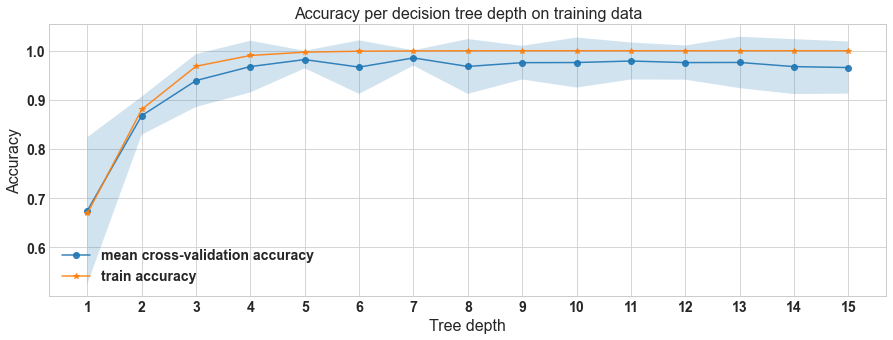

In [12]:
# fitting trees of depth 1 to 15
sm_tree_depths = range(1,16)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

Tree depth 5 has a high accuracy with the smallest Standard Deviation ==> We select 5 as our max depth

## f. Build the model

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 25, max_depth=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=25)

## g. Evaluate the model

In [14]:
train_accuracy = regressor.score(X_train, y_train)
test_accuracy = regressor.score(X_test, y_test)

print(f"Train accuracy = {round(train_accuracy,3) * 100}%")
print(f"Test accuracy = {round(test_accuracy,3) * 100}%")

Train accuracy = 99.7%
Test accuracy = 99.3%


## h. Predict

In [15]:
data = [
    [200000.0, 200000.0, 200000.0, 'New York'],
    [600000.0, 0.0, 0.0, 'California'],
    [0.0, 600000.0, 0.0, 'Florida'],
    [0.0, 0.0, 600000.0, 'New York']
]

In [16]:
data_processed = X_preprocessor.transform(data)
y_pred = regressor.predict(data_processed)

display(y_pred)

array([476485.43      , 174117.4396898 ,  28620.565     ,  77974.77128094])

# 2. Old Car Selling Price

Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

## a. Import the libraries

In [63]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

In [64]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## b. Import the dataset

In [65]:
df = pd.read_csv('./data/car data.csv')
print(f'\nNumber of rows and columns in the data set: {df.shape}\n')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## c. Visualize data

In [66]:
df['Car_age'] = 2018 - df['Year']
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,4.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,2.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,4.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,6.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,15.000000


In [67]:
# Check for missing value
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Car_age          0
dtype: int64

In [68]:
# Remove unnecessary features
df.drop(['Car_Name','Year'], axis = 1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


## d. Perform data pre-processing

In [69]:
X = df.drop('Selling_Price', axis=1).values    # X is all columns before the last column
y = df.iloc[:, 2].values    # Y is the last column

print(f'x = {X[:5]}')    # Show first 5 elements of x
print(f'y = {y[:5]}')    # Show first 5 elements of y

x = [[5.59 27000 'Petrol' 'Dealer' 'Manual' 0 4]
 [9.54 43000 'Diesel' 'Dealer' 'Manual' 0 5]
 [9.85 6900 'Petrol' 'Dealer' 'Manual' 0 1]
 [4.15 5200 'Petrol' 'Dealer' 'Manual' 0 7]
 [6.87 42450 'Diesel' 'Dealer' 'Manual' 0 4]]
y = [27000 43000  6900  5200 42450]


In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('categorical', OneHotEncoder(drop='first'), [2, 3, 4, 5])
    ]
)

In [71]:
X_encoded = np.array(X_preprocessor.fit_transform(X))
display(X_encoded[:5, :])

array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 5.59, 27000, 4],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 9.54, 43000, 5],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 9.85, 6900, 1],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 4.15, 5200, 7],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 6.87, 42450, 4]], dtype=object)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=25)

## e. Select the best model

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []

    for depth in tree_depths:
        tree_model = DecisionTreeRegressor(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=5)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [74]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))

    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)

    ylim = plt.ylim()

    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)
    ax.set_ylim( (ylim[0], ylim[1] + 0.0) )
    ax.set_xticks(depths)

    ax.legend()

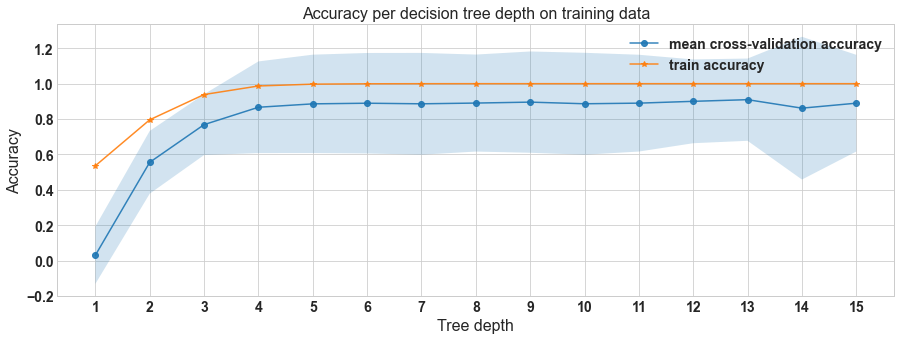

In [75]:
# fitting trees of depth 1 to 15
sm_tree_depths = range(1,16)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

Tree depth 4 has a high accuracy with the smallest Standard Deviation ==> We select 4 as our max depth

## f. Build the model

In [76]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 25, max_depth=4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=25)

## g. Evaluate the model

In [77]:
train_accuracy = regressor.score(X_train, y_train)
test_accuracy = regressor.score(X_test, y_test)

print(f"Train accuracy = {round(train_accuracy,3) * 100}%")
print(f"Test accuracy = {round(test_accuracy,3) * 100}%")

Train accuracy = 98.7%
Test accuracy = 97.1%


# 3. Insurance expense

Dataset: https://www.kaggle.com/awaiskaggler/insurance-csv

## a. Import the libraries

In [78]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

In [79]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## b. Import the dataset

In [81]:
df = pd.read_csv('./data/insurance.csv')
print(f'\nNumber of rows and columns in the data set: {df.shape}\n')

df.head()


Number of rows and columns in the data set: (1338, 7)



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## c. Visualize data

In [82]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [94]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## d. Perform data pre-processing

In [84]:
X = df.iloc[:,:-1].values    # X is all columns before the last column
y = df.iloc[:, -1].values    # Y is the last column

print(f'x = {X[:5]}')    # Show first 5 elements of x
print(f'y = {y[:5]}')    # Show first 5 elements of y

x = [[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.8 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.7 0 'no' 'northwest']
 [32 'male' 28.9 0 'no' 'northwest']]
y = [16884.92  1725.55  4449.46 21984.47  3866.86]


In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('categorical', OneHotEncoder(drop='first'), [1, 3, 4, 5])
    ]
)

In [86]:
X_encoded = np.array(X_preprocessor.fit_transform(X))
display(X_encoded[:5, :])

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 19, 27.9],
       [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 18, 33.8],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 28, 33.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 33, 22.7],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 32, 28.9]],
      dtype=object)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=25)

## e. Select the best model

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []

    for depth in tree_depths:
        tree_model = DecisionTreeRegressor(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=5)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [89]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))

    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)

    ylim = plt.ylim()

    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)
    ax.set_ylim( (ylim[0], ylim[1] + 0.0) )
    ax.set_xticks(depths)

    ax.legend()

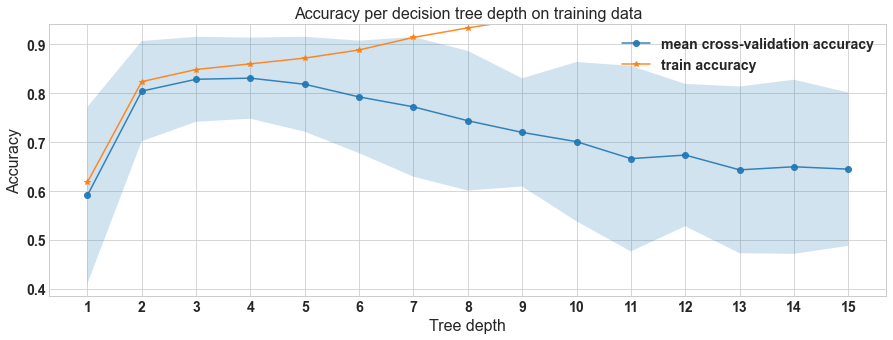

In [90]:
# fitting trees of depth 1 to 15
sm_tree_depths = range(1,16)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

Tree depth 3 has a high accuracy with the smallest Standard Deviation ==> We select 3 as our max depth

## f. Build the model

In [91]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 25, max_depth=3)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=25)

## g. Evaluate the model

In [93]:
train_accuracy = regressor.score(X_train, y_train)
test_accuracy = regressor.score(X_test, y_test)

print(f"Train accuracy = {round(train_accuracy,4) * 100}%")
print(f"Test accuracy = {round(test_accuracy,4) * 100}%")

Train accuracy = 84.86%
Test accuracy = 88.28%
